# Basics of Machine Learning

## Dataset

In [1]:
# customized sys.path temporatily
import sys
sys.path.append('/Users/jianlan/Desktop/prtools')
import prtools as pr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# exercise 1.6 
# create fake dataset with 10 objects with 3 measurements
x = np.random.randn(10,3)
# compute the means and std 
x_mean = np.mean(x)
x_mean_0 = np.mean(x,axis=0)
x_mean_1 = np.mean(x,axis=1)
print(x)

[[-0.56027188 -2.12177139  1.86378643]
 [ 1.00028274  0.80571694  1.04069251]
 [ 0.74535344  1.27800669  0.88204504]
 [-0.04681602  1.80254632 -0.33428329]
 [ 0.02974412 -1.24551619 -0.16260096]
 [-0.27456236 -0.71387729  0.93925189]
 [ 0.70111288  0.45795099  1.4833426 ]
 [ 2.06952149  0.18434295  0.17890431]
 [ 0.00580821 -1.20811679  1.88469877]
 [-0.60714622  1.3552936   0.41628431]]


[-0.56027188  1.00028274  0.74535344 -0.04681602  0.02974412 -0.27456236
  0.70111288  2.06952149  0.00580821 -0.60714622]
[-2.12177139  0.80571694  1.27800669  1.80254632 -1.24551619 -0.71387729
  0.45795099  0.18434295 -1.20811679  1.3552936 ]


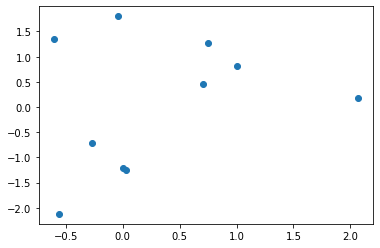

In [3]:
# exercise 1.7 
# make scatterplot
plt.scatter(x[:,0],x[:,1])
print(x[:,0])
print(x[:,1])

In [5]:
# exercise 1.8
# invent lables for the fake dataset 
lab = np.array([1,1,1,1,2,2,2,2,2,2]).T
a = pr.prdataset(x,lab)
print(a)


10 by 3 prdataset with 2 classes: [4 6]


Boomerangs 100 by 3 prdataset with 2 classes: [52 48]
[[ 0.42413469  0.35865042  0.59129393]
 [ 0.48776128  0.08101429  0.83531305]
 [ 0.17011031  0.50357294  0.18742849]
 [ 0.43167953  0.23012938  0.67772627]
 [ 0.37116817 -0.30859118  0.56135523]
 [ 0.21380122 -0.41770337  0.2917947 ]
 [ 0.51916103  0.06021012  0.84097194]
 [ 0.41804098 -0.31611293  0.56577497]
 [ 0.21274229  0.46065001  0.25595241]]


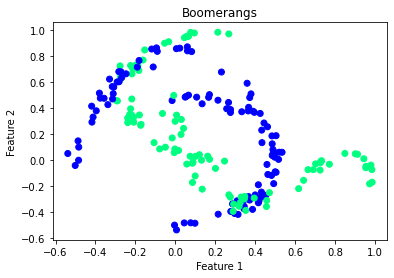

In [6]:
# exercise 1.9 
# load dataset and make the scatterplot of it
pr_data = pr.boomerangs(100)
print(pr_data)
pr.scatterd(pr_data)
pr.scatterd(pr_data[:,[1,2]])
# extract the original data matrix from a prdataset use '+' operator
# the labels of the data matrix is stored in lab = a.targets
pr_data_extract = +pr_data
print(pr_data_extract[1:10,:])

## Classification with Normal Densities

[[-0.06292374  0.54371687]
 [-1.6566983  -2.11187952]
 [ 0.8448727   0.08943275]
 [ 0.34229295 -0.04271161]
 [ 0.55164387 -1.54023148]
 [ 0.69397097  0.64314945]
 [ 1.21313243 -0.01833866]
 [ 1.04102481  0.56886113]
 [ 1.15458501  0.21701898]
 [ 1.38513985  0.00410991]]
Gaussian density, 2 to 1 trained mapping


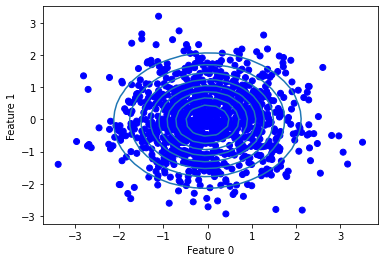

In [7]:
# exercise 1.13
# generate 1000 random point from a 2D standard normal distribution
a = np.random.randn(1000,2)
print(a[0:10,:])
# turn the random points into prdataset
a = pr.prdataset(a)
# scatterd the data
pr.scatterd(a)
# mapping w
w = pr.gaussm(a)
print(w)
pr.plotm(w)

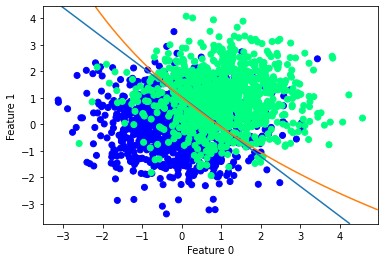

In [14]:
# exercise 1.15
# 2D normal distributions with different means but equal covariance matrix 
# create fake dataset
# change the sample point from 10 to 1000 

# change the num from 10 to 1000
num = 1000
mean_a = [0,0]
cov_a = [[1,0],[0,1]]
fake_data_a = np.random.multivariate_normal(mean_a,cov_a,num)

mean_b = [1,1]
cov_b = cov_a
fake_data_b = np.random.multivariate_normal(mean_b,cov_b,num)

fake_data = np.concatenate((fake_data_a,fake_data_b))


# hard code labels
lab = []
for i in range(0,num):
    lab.append(1)
for i in range(0,num):
    lab.append(2)


# create prdataset
fake_prdata = pr.prdataset(fake_data,np.array(lab).T)
# scattered fake prdata
pr.scatterd(fake_prdata)

# estimate linear discriminants
m_ldc = pr.ldc(fake_prdata)

# estimate quadratic discriminants
# In a way, the quadratic disciminant classifier
# doesn't depend on the opitmal bounday
# typyically, the shape is quadratic due to the limited of training samples. 
m_qdc = pr.qdc(fake_prdata)

# plot decision boundary
pr.plotc(m_ldc)
pr.plotc(m_qdc)

# with the increase of the sample points 
# the two lines become more and more similiar 

# customize a function for generating the fake dataset 


## Density Estimation using Parzen densities

In [16]:
# exercise 1.17
# creating a simple dataset
a = pr.gendats([20,20],1,8)
help(pr.gendats)

Help on function gendats in module prtools.prtools:

gendats(n, dim=2, delta=2.0)
    Generation of a simple classification data.
    
        A = gendats(N,DIM,DELTA)
    
    Generate a two-class dataset A from two DIM-dimensional Gaussian
    distributions, containing N samples. Optionally, the mean of the
    first class can be shifted by an amount of DELTA.



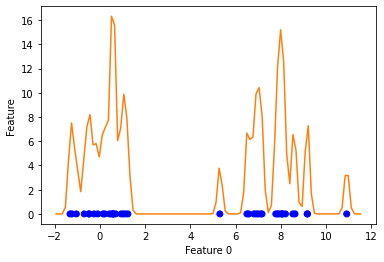

In [31]:
# define the parameter h for the Parzen Kernel
h = 0.1
# function parzenm estimates a density for a given data set
a = pr.prdataset(+a)
w = pr.parzenm(a,h)
pr.scatterd(a)
pr.plotm(w,gridsize=100)

In [ ]:
# exercise 1.8 
# how to evaluate a fit of a density model to some data
# One possibility is to use the loglikelihood 

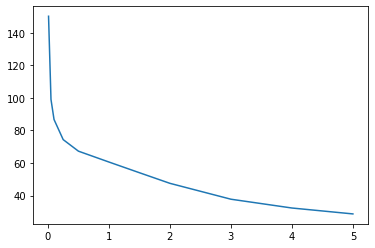

In [29]:
# evaluate loglikelihood on training set 
a = pr.gendats([20,20],1,8) # Generate data
a = pr.prdataset(+a)
hs = [0.01,0.05,0.1,0.25,0.5,1,1.5,2,3,4,5] # Array of h's to try
LL = np.zeros(len(hs))
for i in range(len(hs)): # For each h...
    w = pr.parzenm(a,hs[i]) # estimate Parzen density
    LL[i] = np.sum(np.log(+(a*w))); # calculate log-likelihood
plt.plot(hs,LL)

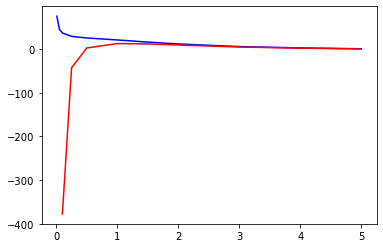

In [34]:
# exercise 1.19
[trn,tst] = pr.gendat(a,0.5) # Split into trn and tst, both 50%
hs = [0.01,0.05,0.1,0.25,0.5,1,1.5,2,3,4,5] # Array of h's to try
Ltrn = np.zeros(len(hs))
Ltst = np.zeros(len(hs))

for i in range(len(hs)): # For each h...
    w = pr.parzenm(trn,hs[i]) # estimate Parzen density
    Ltrn[i] = np.sum(np.log(+(trn*w))) # calculate trn log-likelihood
    Ltst[i] = np.sum(np.log(+(tst*w))) # calculate tst log-likelihood

plt.plot(hs,Ltrn,'b-') # Plot trn log-likelihood as function of h
plt.plot(hs,Ltst,'r-') # Plot tst log-likelihood as function of h 
# the test curve has a clear maximum at h =1 
# and not at the minimal h as in the training set curve
# in the training set curve, there is a clear over training effect

## The scaling problem

In [48]:
# some classifers are sensitve to the scaling of features 
# those classifers can change dramatically due to the rescaling of 
# features 
# a new dataset in which the second feature is 10 times larger then # the dataset above 
# train six classifers nmc, ldc, qdc, fisherc, parzenc, knnc, 


